In [1]:
from Utils import * 
from param_tools import *
import pickle
import matplotlib
import numpy as np

In [2]:
## Select Padrameters

n_pts = 60
noise = 0.05 #add gaussain noise
energyType = 1 # 0:harmonic, 1:spring
S = 0 # rest length of spring
K = 1e2 # spring constant
n_steps = 4000 # number of optimization steps
alpha = 1e-5 # need to be much smaller for spring energy (1e-5 is reasonable for spring energy with K = 1e2)


In [3]:
## Generate data

np.random.seed(10)

data = generate_noisy_sphere(n_pts, radius=1, noise=noise)
#data = generate_density_sphere(n_pts, radius=1, noise=noise, angle=np.pi/4)



In [4]:
# Get homological information from Ripser

max_barcode = 1 #off/on/SECOND Largest choice of barcode, overides choose and max_nhood if > 0, -1: smallest code
field = 5 # for computing cocycles
cocycles, distance_matrix, ripser_result = initial_ripser_calculation(data, field, plot=0)
if max_barcode != 0:
    choose = 0
    length = 0
    lengths = []
    n_sizes = []
    for i in range(0, len(cocycles[2][:])):
        birth = ripser_result['dgms'][2][i][0]
        death = ripser_result['dgms'][2][i][1]
        life = death - birth
        lengths.append(life)
        n_sizes.append((1 * death + 3 * birth) / 4)
    if max_barcode == 1:
        idx = np.argmax(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == 2:
        n = 2
        idxes = [lengths.index(i) for i in sorted(lengths, reverse=True)][:n]
        idx = idxes[1]
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == -1:
        idx = np.argmin(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
else:
    birth = ripser_result['dgms'][2][choose][0]
    death = ripser_result['dgms'][2][choose][1]
    max_nhood_size = (death + 3 * birth) / 4

selected_cocycle = cocycles[2][choose]
simplices, values, weight_values = dim_2_get_edges_and_cohomology_info(distance_matrix, selected_cocycle, max_nhood_size, weighting = 'triangles')
trg_list = np.fliplr(np.array(simplices))

In [5]:
values = np.array(values)
print(values[values>=1])


[1 4 4 4 4 4]


Sum of Values:21
Choose:0


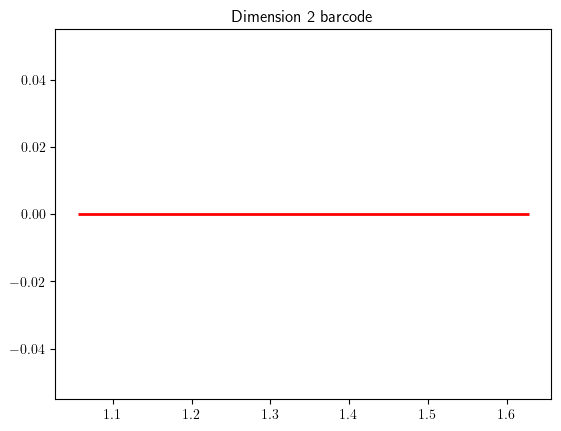

In [6]:
# Make barcode
sum_val = np.sum(values)
print('Sum of Values:'+str(sum_val))
plt.figure()
for i in range(0, len(cocycles[2][:])):
    birth = ripser_result['dgms'][2][i][0]
    death = ripser_result['dgms'][2][i][1]
    if i == choose:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
        print('Choose:'+str(i))
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.title('Dimension 2 barcode')
plt.show()

In [7]:
## Barycenters and points
print('Setting up points and barycenters')
bary = np.zeros(trg_list.shape)
orient = np.zeros(len(trg_list))
for i in range(len(trg_list)):
    if values[i] == 0:
        bary[i, :] = [1, 0, 0]
    else:
        bary[i, :] = [-1, 0, 0]
        if values[i] == 1:
            orient[i] = 1
        else:
            orient[i] = -1
pts = np.zeros([len(data), 3])
pts[:,0] = 1

Setting up points and barycenters


Beginning Minimization
0 1765.0559286597957
1 2.2483457281377173
2 2.2482635715368615
3 2.2481800224616517
4 2.248095084697223
5 2.24800876187424
6 2.2479210574757023
7 2.247831974843724
8 2.2477415171857813
9 2.2476496875804295
10 2.24755648898274
11 2.247461924229289
12 2.2473659960428587
13 2.2472687070368207
14 2.2471700597192426
15 2.2470700564967405
16 2.2469686996780944
17 2.2468659914776423
18 2.2467619340184766
19 2.246656529335469
20 2.2465497793780838
21 2.246441686013039
22 2.246332251026883
23 2.246221476128327
24 2.246109362950539
25 2.245995913053264
26 2.245881127924848
27 2.245765008984135
28 2.2456475575823096
29 2.2455287750046264
30 2.2454086624719873
31 2.2452872211425756
32 2.24516445211329
33 2.2450403564211503
34 2.244914935044623
35 2.2447881889049297
36 2.244660118867217
37 2.244530725741746
38 2.244400010284959
39 2.2442679732005426
40 2.2441346151404455
41 2.2439999367058108
42 2.2438639384479093
43 2.243726620868978
44 2.243587984423084
45 2.243448029516915

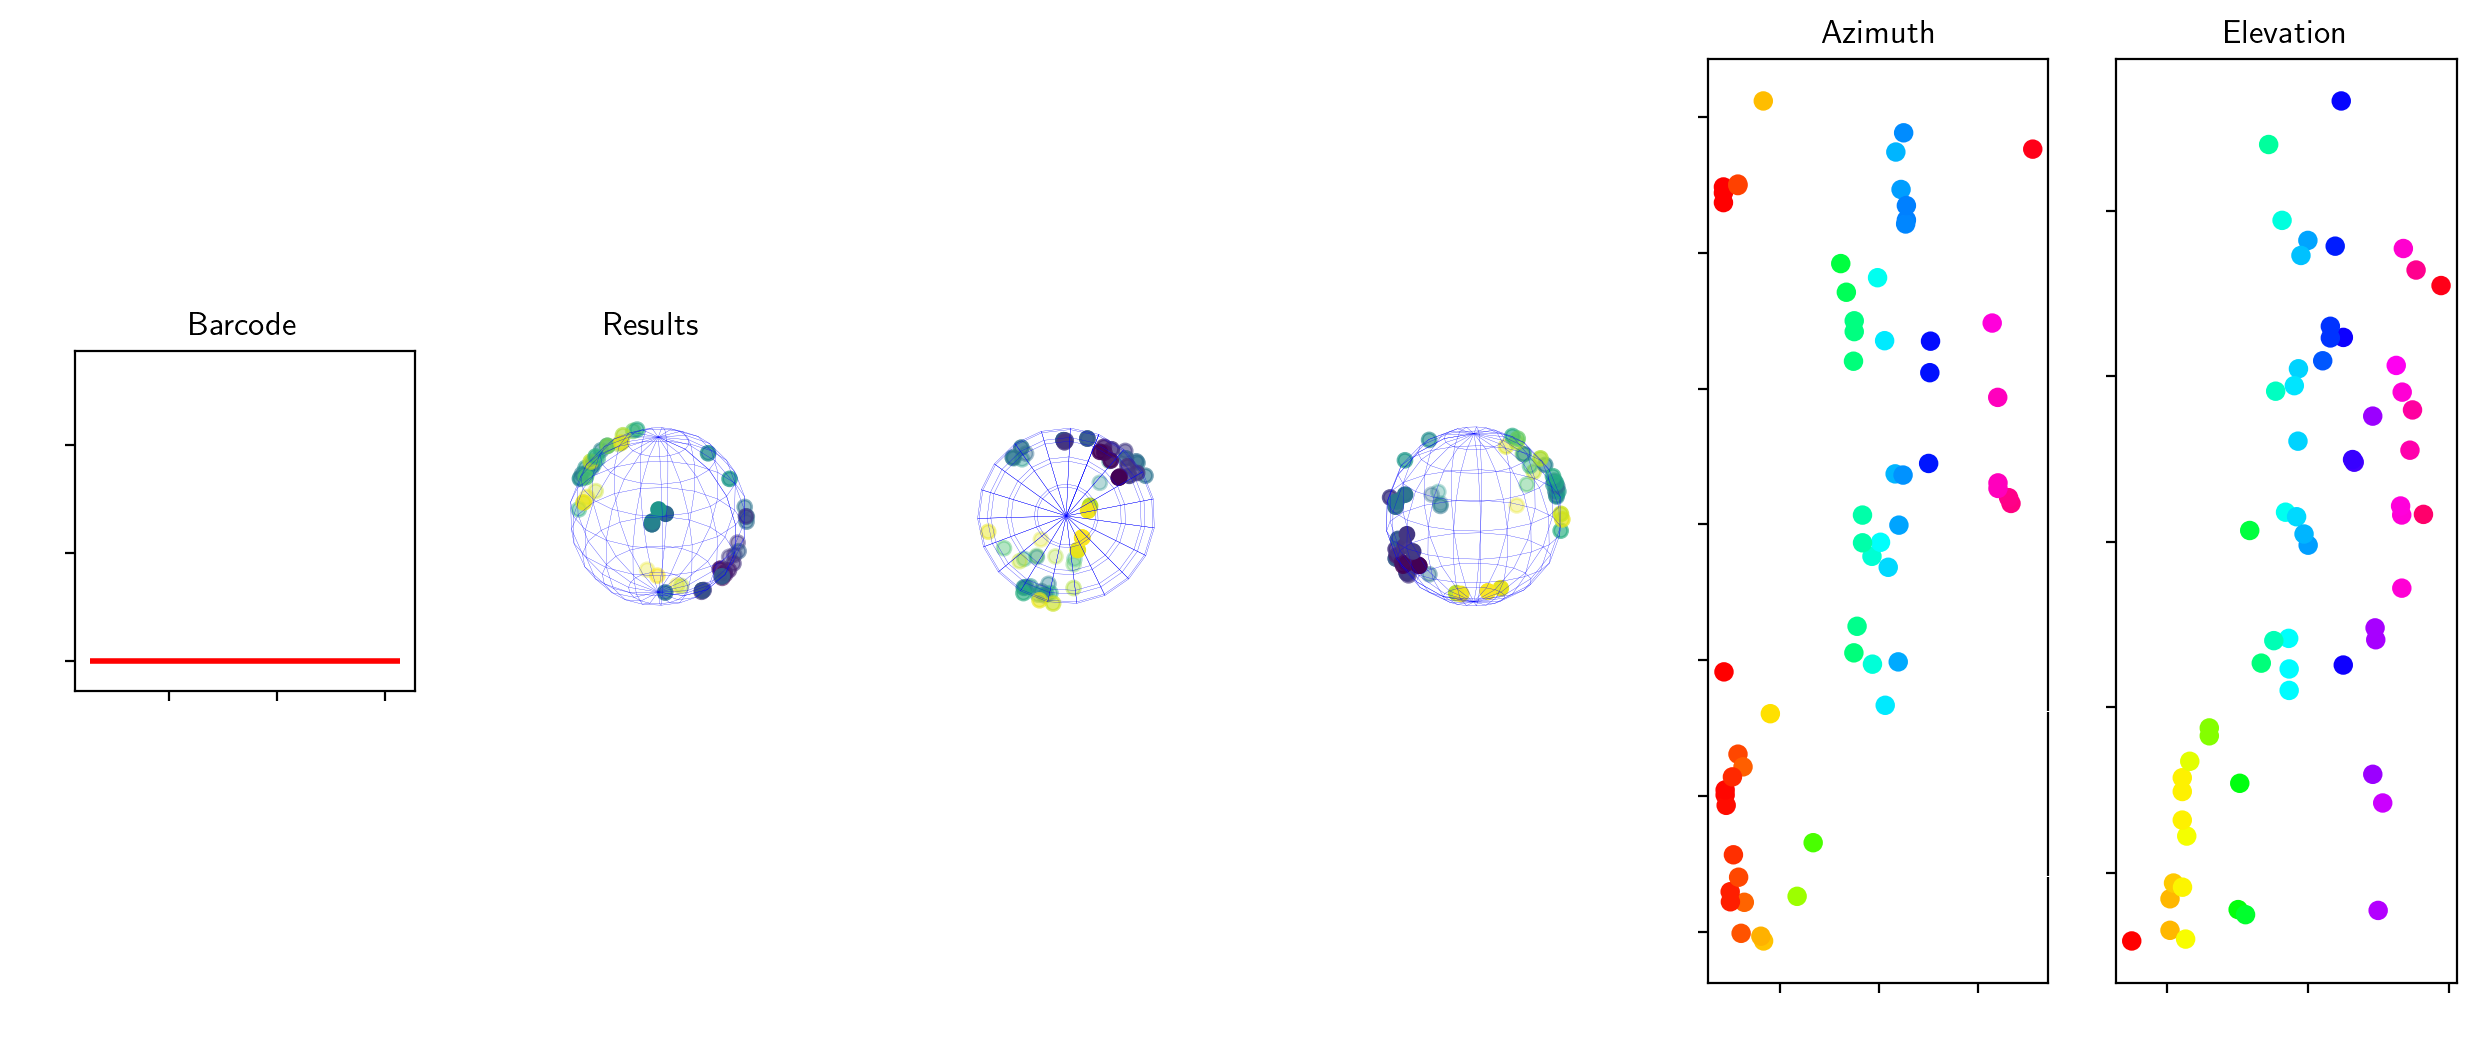

501 35.89228136170833
502 35.804816847702796
503 35.71617084237379
504 35.626327193171086
505 35.53527264083271
506 36.216440539871016
Increasing at 506
507 36.09527466957111
508 35.97309029695529
509 35.849990514397504
510 35.72594351968725
511 35.60080340197388
512 35.47475467562013
513 35.3478166607099
514 35.220021441381476
515 35.09135534928418
516 34.96186629861242
517 34.82975316795137
518 34.695622299108685
519 34.55822801175679
520 34.41123257261605
521 33.929489138383765
522 33.79905892725794
523 33.672156481672204
524 33.516556997178064
525 33.31016639231111
526 33.00313927631776
527 32.7052788591473
528 32.53971475184794
529 32.422831883738745
530 32.31601461399676
531 32.21148957660655
532 32.107851386345786
533 32.003238175451806
534 31.90006421889742
535 31.797995051513336
536 31.69653730102757
537 31.59560796311015
538 31.495275784159826
539 31.39551773230777
540 31.296236080629296
541 31.195948432113685
542 31.09584155774863
543 30.99577514162026
544 30.89636483821493


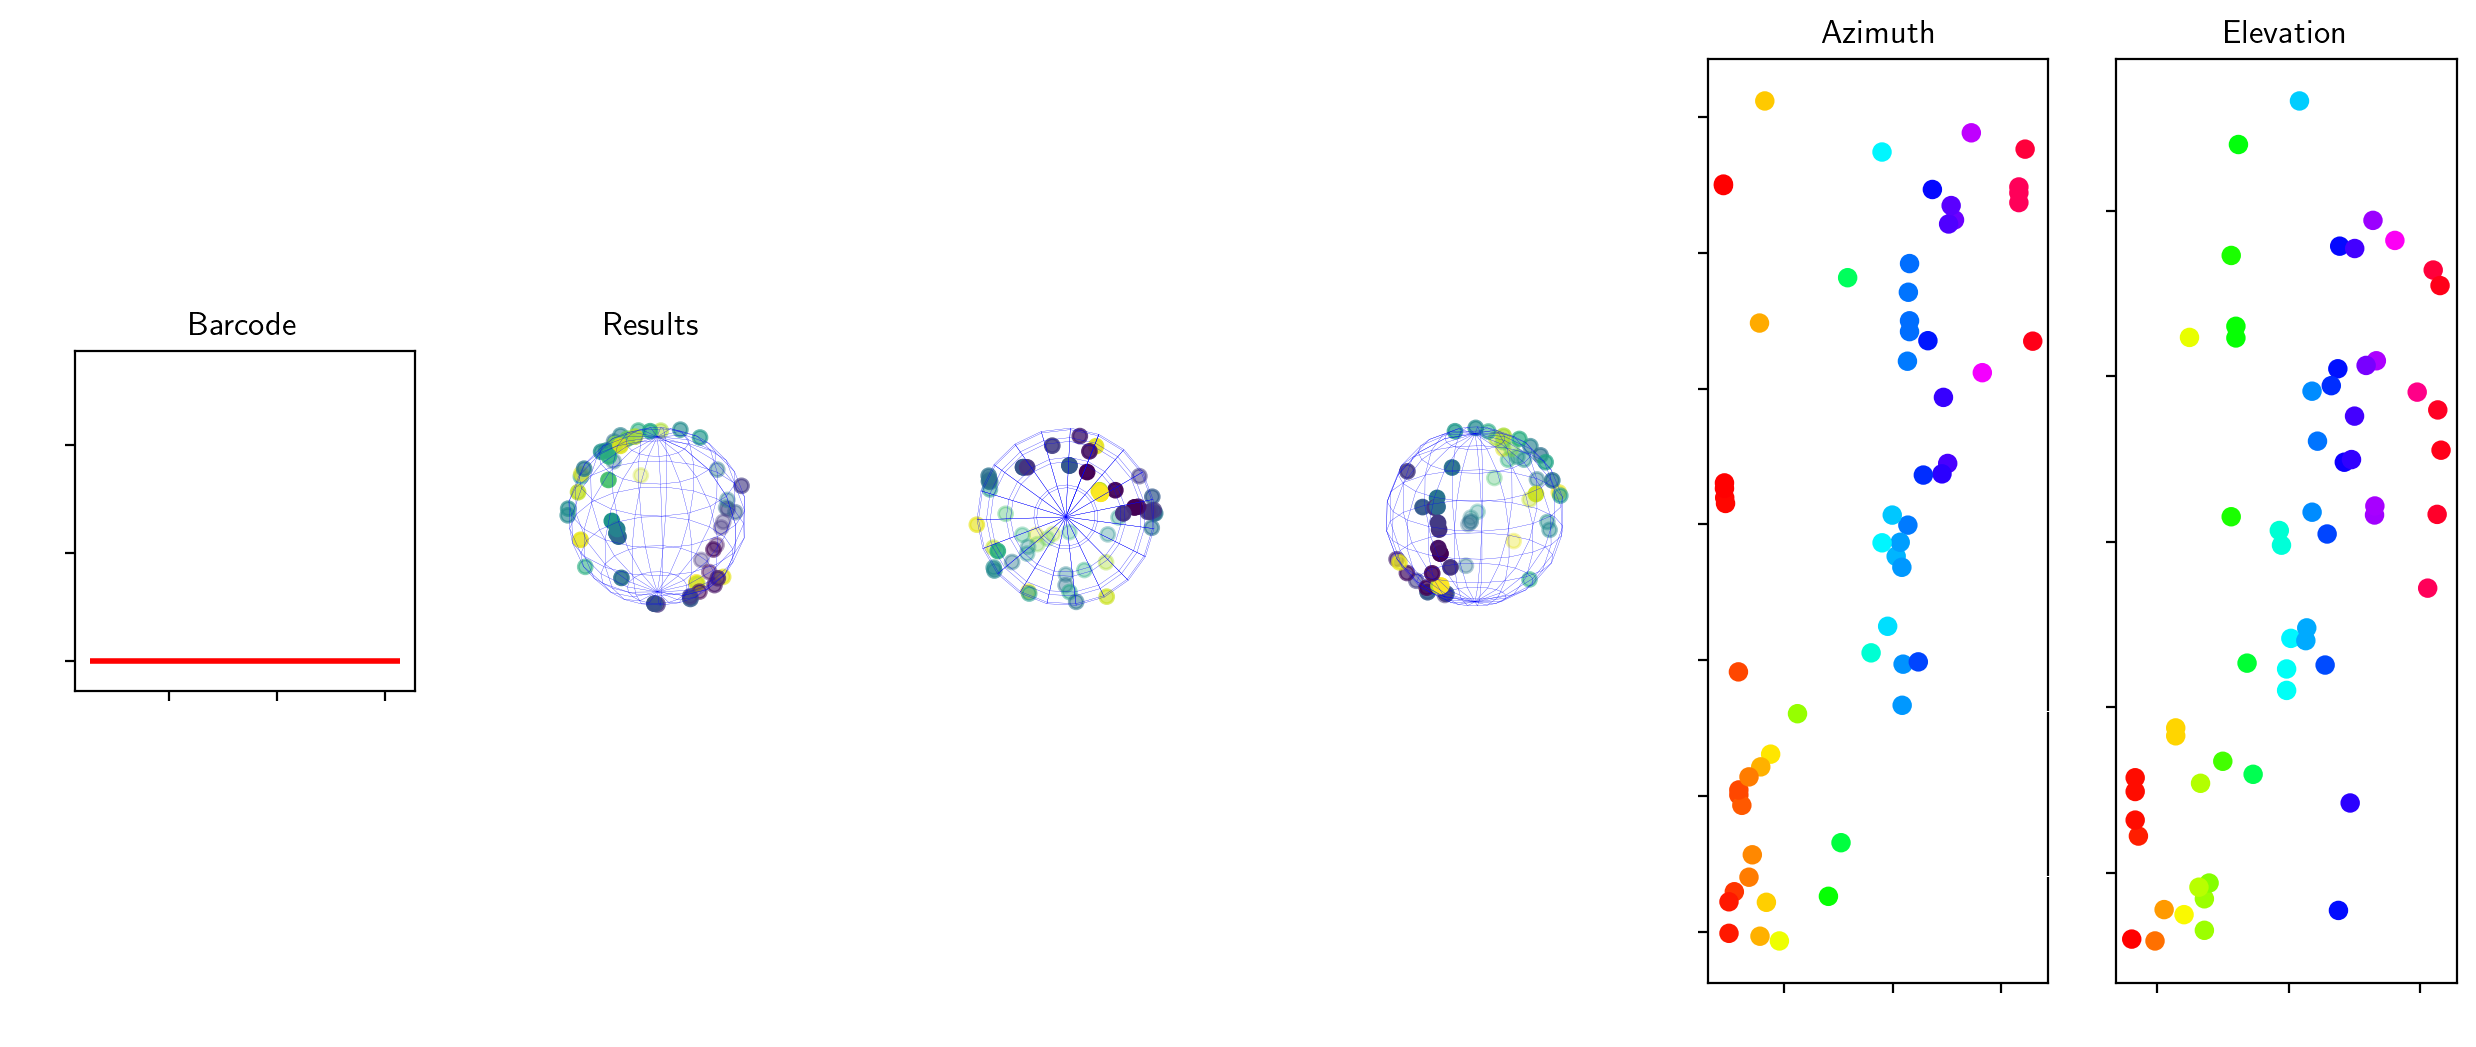

1001 22.458601095283473
Increasing at 1001
1002 22.459079130863884
Increasing at 1002
1003 22.459690262044777
Increasing at 1003
1004 22.460356093875415
Increasing at 1004
1005 22.460771846684217
Increasing at 1005
1006 22.461236295499354
Increasing at 1006
1007 22.461757259466157
Increasing at 1007
1008 22.46233650397916
Increasing at 1008
1009 22.462975868402786
Increasing at 1009
1010 22.46367726884635
Increasing at 1010
1011 22.482423909541428
Increasing at 1011
1012 22.481375184947908
1013 22.4805966173161
1014 22.48002581177095
1015 22.479641789019542
1016 22.479428487064713
1017 22.478788524135
1018 22.478161652669378
1019 22.477666605349665
1020 22.477334637537012
1021 22.47722243008919
1022 22.476479737130212
1023 22.47583579628387
1024 22.475287916544595
1025 22.47483405848298
1026 22.474472725666942
1027 22.474202886636697
1028 22.474023912981263
1029 22.47393553171545
1030 22.47393778933952
Increasing at 1030
1031 22.474092057913914
Increasing at 1031
1032 22.47438375600582

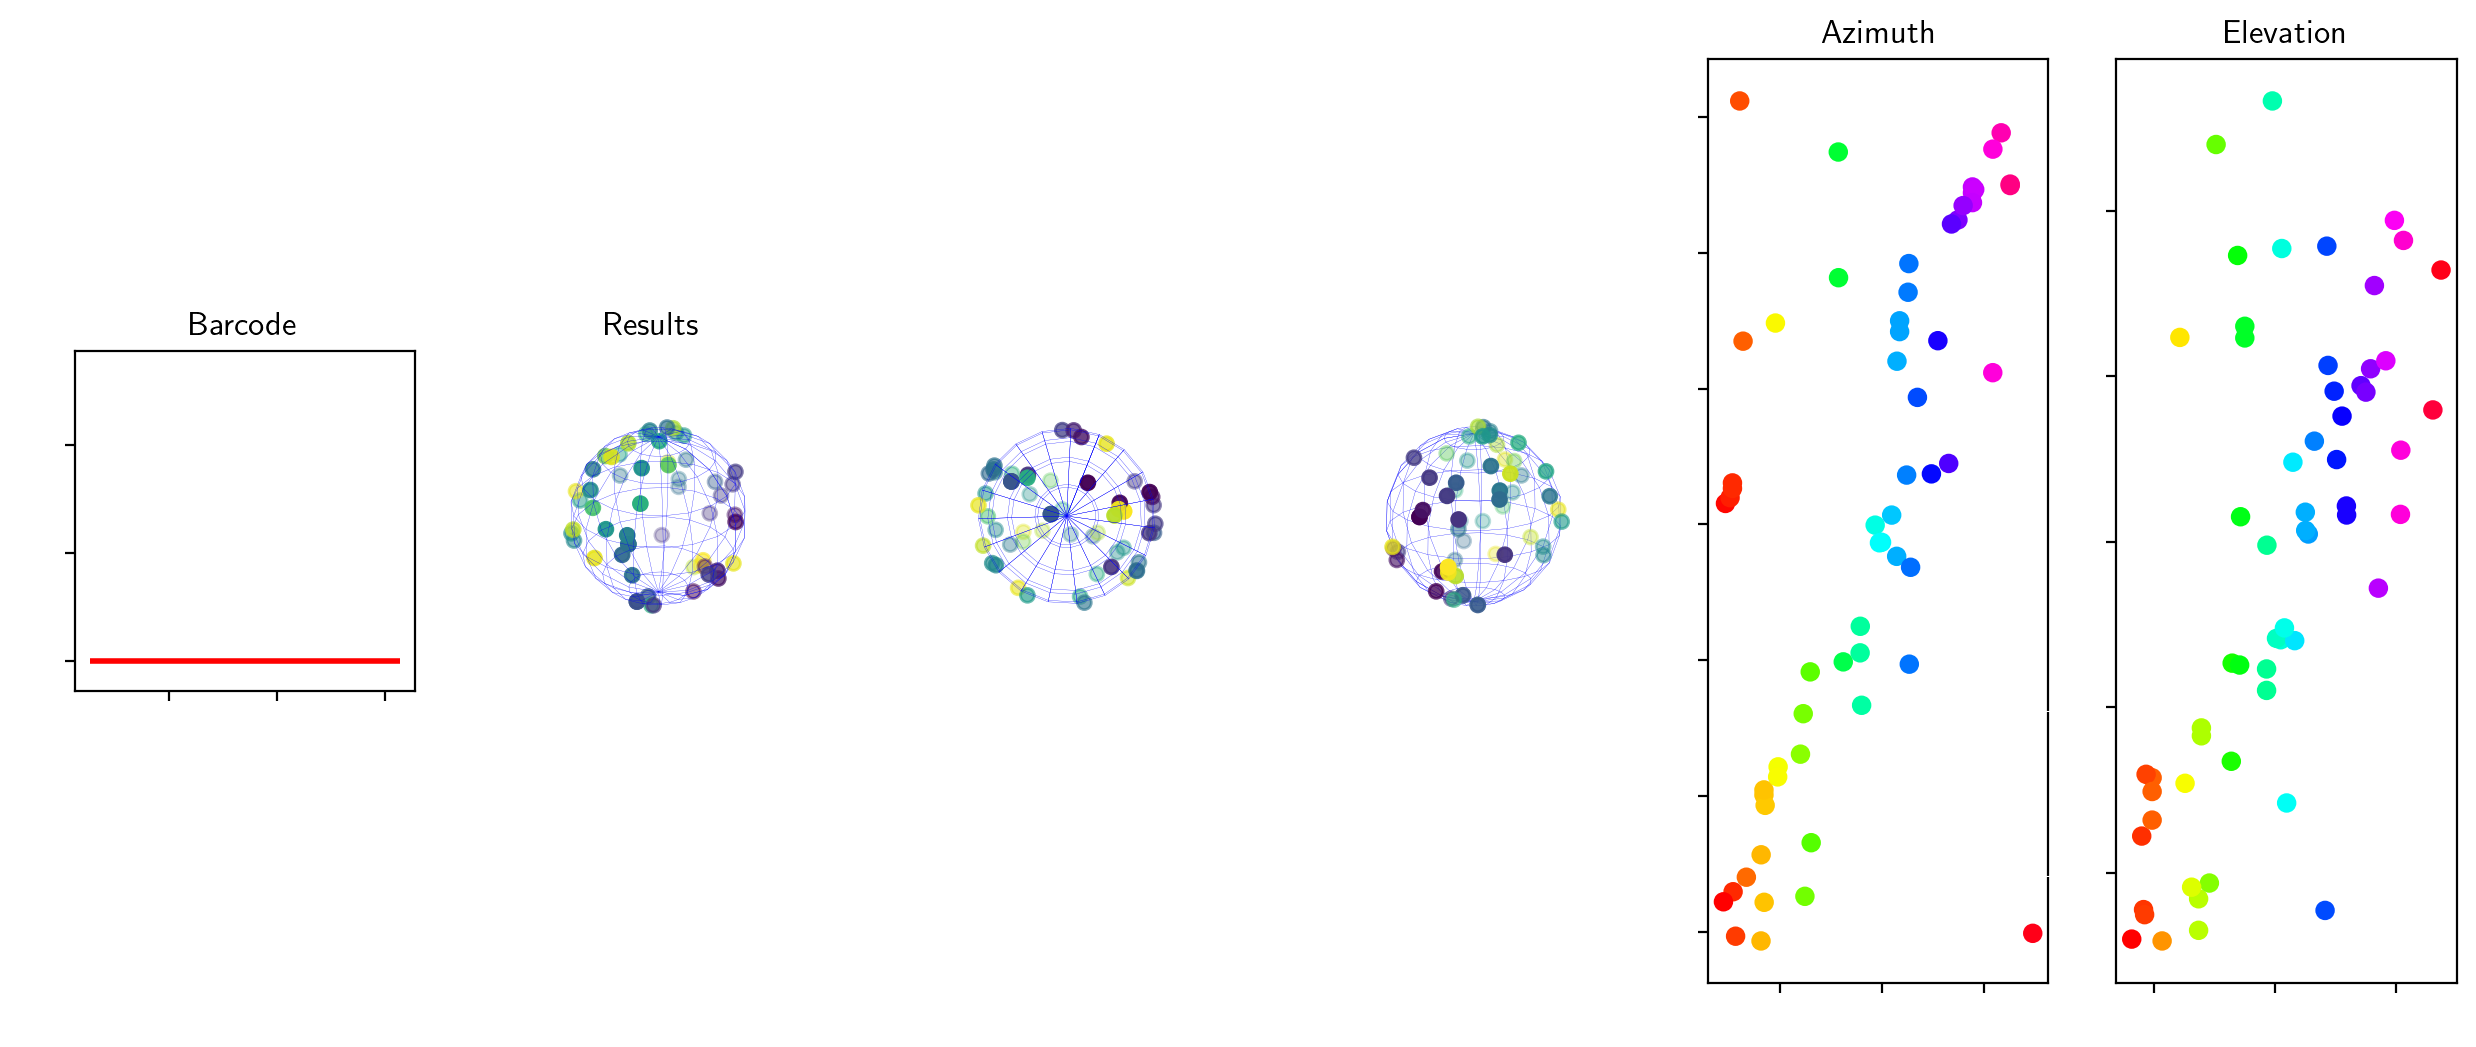

2001 21.50112050147058
2002 21.501041785536138
2003 21.500963169564045
2004 21.500884645817404
2005 21.50080620730527
2006 21.500727847699384
2007 21.500649561332086
2008 21.50057134309336
2009 21.50049318842892
2010 21.500415093253125
2011 21.5003370539504
2012 21.500259067360453
2013 21.500181130651935
2014 21.50010324134268
2015 21.500025397256508
2016 21.499947596537442
2017 21.499869832820455
2018 21.499792102304617
2019 21.49971440478395
2020 21.499636739069842
2021 21.510427751148455
Increasing at 2021
2022 21.50941652275171
2023 21.508476391797913
2024 21.507601939394057
2025 21.50678818718412
2026 21.506030547389553
2027 21.505324804703367
2028 21.504667079020223
2029 21.50405379270228
2030 21.50348164462038
2031 21.502947586695054
2032 21.502448802814982
2033 21.50198268798455
2034 21.501546834260786
2035 21.501139013891848
2036 21.500757164752144
2037 21.500399377369117
2038 21.500063883069405
2039 21.499749051442425
2040 21.499453377179933
2041 21.499175453024957
2042 21.49

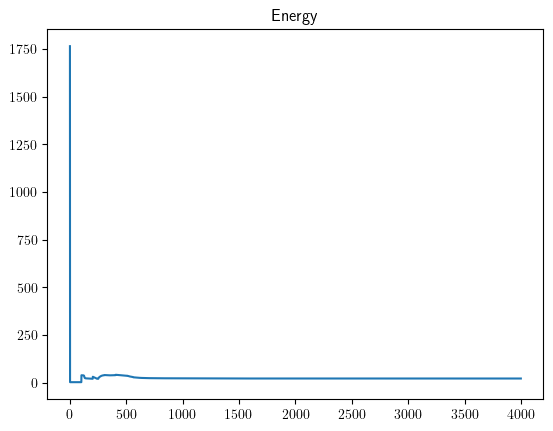

In [8]:
# Minimization
NRG = []
print('Beginning Minimization')
for i in range(n_steps):
    # Compute NRG
    E, E_list, A_list, grad = compute_grad_and_NRG(pts, trg_list, bary, orient, energyType, weight_values, S, K)
    NRG.append(E)
    if math.isnan(E):
        print('NAN at i='+str(i))
        break
    # update Grad
    pts, bary = compute_grad_step(pts, trg_list, grad, bary, alpha, i)

    print(i, E)
    # if i % (n_steps // 5) == 0:
    #     if dataType == 0 or dataType == 2 or dataType == 3 or dataType == 4:
    #         plot_data_and_results(data, pts, title=str(i))
    #     plt.show()
    if i > 1:
        if NRG[-2] < NRG[-1]:
            print('Increasing at '+str(i))
            #break
    if i in [500, 1000, 2000, 4000, 6000]:
        # Make plots
        fig = plt.figure(figsize=(18, 6), dpi=200)
        simplices = np.array(simplices)
        arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

        ax = fig.add_subplot(1, 7, 2)
        for i in range(0, len(cocycles[2][:])):
            birth = ripser_result['dgms'][2][i][0]
            death = ripser_result['dgms'][2][i][1]
            if i == choose:
                plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
            else:
                plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
        plt.title('Barcode')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.axis('Square')

        u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
        x = np.cos(u) * np.sin(v)
        y = np.sin(u) * np.sin(v)
        z = np.cos(v)
        c = np.sum(data, axis=1).tolist()
        c = c - np.min(c)
        c = c/np.max(c)
        for i in range(3):
            ax = fig.add_subplot(1, 7, 3 + i, projection='3d')
            ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], marker='.', c=c, s=100)
            ax.plot_wireframe(x, y, z, color='b', linewidth=.1)
            ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
            if i == 1:
                ax.view_init(-90, -20)
            if i == 2:
                ax.view_init(-20, 90)
            if i == 0:
                plt.title('Results')
            ax.axis('off')
            ax.grid(visible=None)

        R1, pts1_rotated = align_spheres(pts, data)
        p1, s1 = coord_plot_sphere(pts1_rotated, data, plot=0)
        plt.subplot(1, 7, 6)
        plt.scatter(p1[:, 0], s1[:, 0], c=p1[:, 0], cmap='hsv')
        plt.title('Azimuth')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.subplot(1, 7, 7)
        plt.scatter(p1[:, 1], s1[:, 1], c=p1[:, 1], cmap='hsv')
        plt.title('Elevation')
        plt.yticks(color='w')
        plt.xticks(color='w')
        plt.show()

# converge
plt.figure()
plt.plot(np.arange(len(NRG)), NRG)
plt.title('Energy')
plt.show()

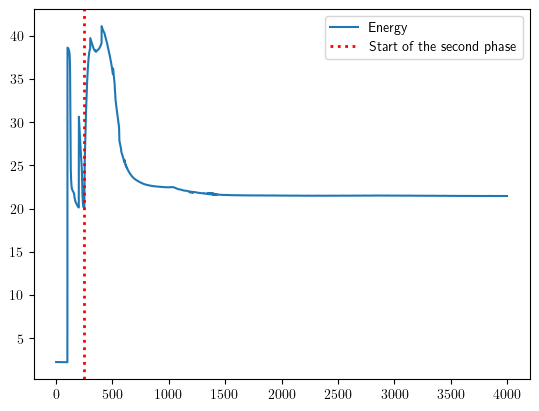

In [9]:
plt.figure()
plt.plot(np.arange(len(NRG)-1), NRG[1:], label = 'Energy')
plt.axvline(x=250, color='red', linestyle=':', linewidth=2, label='Start of the second phase')
plt.legend()
plt.show()

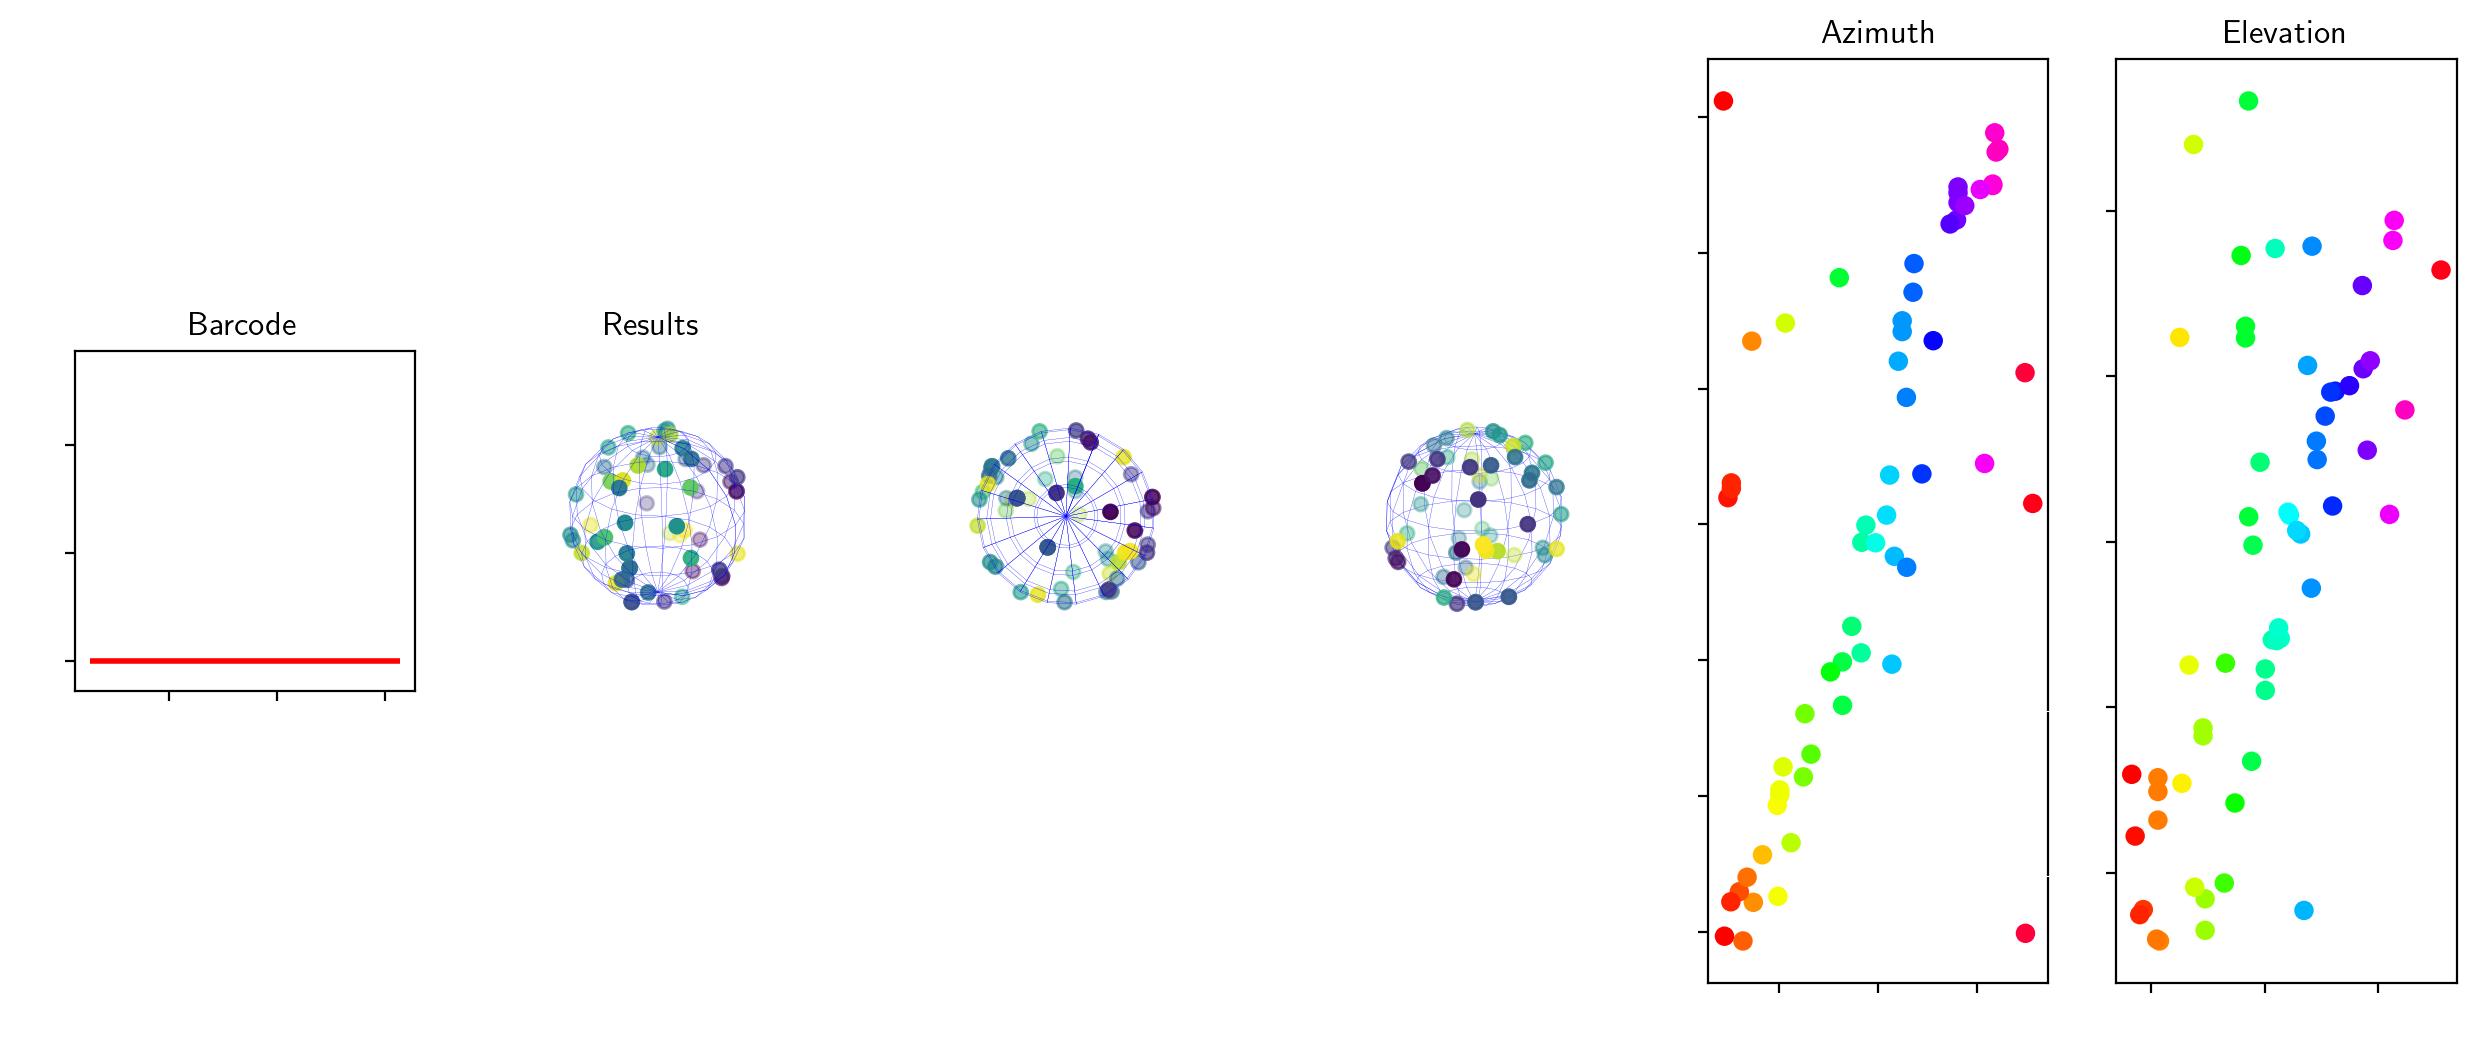

In [10]:
# Make plots
fig = plt.figure(figsize=(18, 6), dpi=200)
simplices = np.array(simplices)
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

ax = fig.add_subplot(1, 7, 2)
for i in range(0, len(cocycles[2][:])):
    birth = ripser_result['dgms'][2][i][0]
    death = ripser_result['dgms'][2][i][1]
    if i == choose:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='r')
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.title('Barcode')
plt.yticks(color='w')
plt.xticks(color='w')
plt.axis('Square')

u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
c = np.sum(data, axis=1).tolist()
c = c - np.min(c)
c = c/np.max(c)
for i in range(3):
    ax = fig.add_subplot(1, 7, 3 + i, projection='3d')
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], marker='.', c=c, s=100)
    ax.plot_wireframe(x, y, z, color='b', linewidth=.1)
    ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
    if i == 1:
        ax.view_init(-90, -20)
    if i == 2:
        ax.view_init(-20, 90)
    if i == 0:
        plt.title('Results')
    ax.axis('off')
    ax.grid(visible=None)

R1, pts1_rotated = align_spheres(pts, data)
p1, s1 = coord_plot_sphere(pts1_rotated, data, plot=0)
plt.subplot(1, 7, 6)
plt.scatter(p1[:, 0], s1[:, 0], c=p1[:, 0], cmap='hsv')
plt.title('Azimuth')
plt.yticks(color='w')
plt.xticks(color='w')
plt.subplot(1, 7, 7)
plt.scatter(p1[:, 1], s1[:, 1], c=p1[:, 1], cmap='hsv')
plt.title('Elevation')
plt.yticks(color='w')
plt.xticks(color='w')
plt.show()

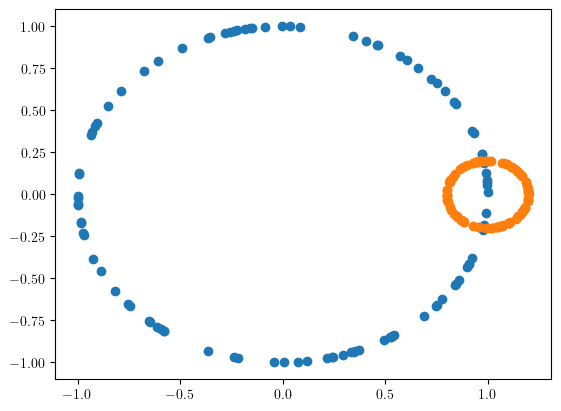

In [11]:
n = 100
coord = np.random.uniform(low=0, high=2*np.pi, size=n) 
x = [np.cos(co) for co in coord]
y = [np.sin(co) for co in coord] 

x_1 = [1 + np.cos(co)/5 for co in coord]
y_1 = [np.sin(co)/5 for co in coord]

plt.scatter(x,y)
plt.scatter(x_1, y_1)


plt.show()

data = np.random.uniform(-1.0, 1.0, [2*n, 2])
for i in range(n):
    data[i][0] = x[i]
    data[n+i][0] = x_1[i]
    data[i][1] = y[i]
    data[n+i][1] = y_1[i]




In [12]:
# Get homological information from Ripser

max_barcode = 1 #off/on/SECOND Largest choice of barcode, overides choose and max_nhood if > 0, -1: smallest code
field = 5 # for computing cocycles
cocycles, distance_matrix, ripser_result = initial_ripser_calculation(data, field, plot=0)
if max_barcode != 0:
    choose = 0
    length = 0
    lengths = []
    n_sizes = []
    for i in range(0, len(cocycles[1][:])):
        birth = ripser_result['dgms'][1][i][0]
        death = ripser_result['dgms'][1][i][1]
        life = death - birth
        lengths.append(life)
        n_sizes.append((1 * death + 3 * birth) / 4)
    if max_barcode == 1:
        idx = np.argmax(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == 2:
        n = 2
        idxes = [lengths.index(i) for i in sorted(lengths, reverse=True)][:n]
        idx = idxes[1]
        choose = idx
        max_nhood_size = n_sizes[idx]
    if max_barcode == -1:
        idx = np.argmin(lengths)
        choose = idx
        max_nhood_size = n_sizes[idx]
else:
    birth = ripser_result['dgms'][1][choose][0]
    death = ripser_result['dgms'][1][choose][1]
    max_nhood_size = (death + 3 * birth) / 4

selected_cocycle = cocycles[1][choose]


Choose:0
Choose:2


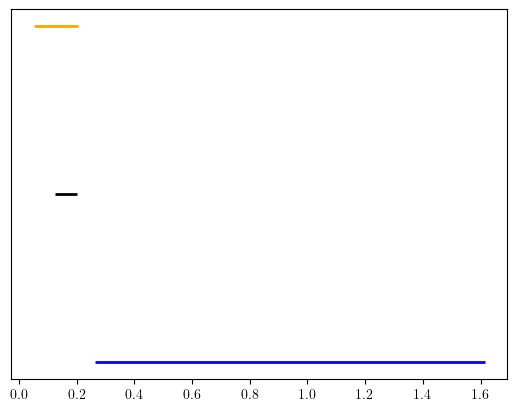

In [13]:
for i in range(0, len(cocycles[1][:])):
    birth = ripser_result['dgms'][1][i][0]
    death = ripser_result['dgms'][1][i][1]
    if i == 0:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='blue')
        print('Choose:'+str(i))
    elif i ==2:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='orange')
        print('Choose:'+str(i))
    else:
        plt.hlines(y=i, xmin=birth, xmax=death, linewidth=2, color='k')
plt.yticks([])
plt.show()

# Evaluation of the model

In [14]:
def modulo_difference(p, s, q):

    diff = []
    # Compute the difference modulo q
    for i in range(len(p)):
        diff.append(np.min(((p[i] - s[i]) % q, (s[i] - p[i]) % q)))
    
    return np.array(diff)



a = np.sqrt(np.sum(modulo_difference(p1[:,0], s1[:,0], 2*np.pi)**2))
b = np.sqrt(np.sum(modulo_difference(p1[:,1], s1[:,1], 100)**2))

n = len(p1)
print(a/n)
print(b/n)

0.14772014233589684
0.07530504165829166
